## Q1: When is the best time of year to fly to minimise delays?

### Data Wrangling

In [2]:
import numpy as np
import pandas as pd

fullset = pd.read_csv('../datasets/fullset cleaned.csv')

# Subsetting flights by departure delays to answer Q1
Q1 = fullset[["Year","Month","DayofMonth","DayOfWeek","CRSDepTime","DepDelay"]]

In [575]:
# Creating a separate column where flights delayed for more than 15mins are given '1' and '0' otherwise

Q1['Delayed'] = np.where(Q1["DepDelay"] > 15, 1, 0)

In [576]:
#Converting CRSDepTime to time format

#Extracting the hours and minutes
Minutes = Q1.CRSDepTime.astype(str).str[-2:]
Hours = Q1.CRSDepTime.astype(str).str[:-2]

#Setting the empty entries in Hours to 00 or 12am
Hours[Hours == ""]= '0'

#Combining Hours+Minutes to give CRSDepTime in time format
Q1['CRSDepTime'] = pd.to_datetime(
        Hours + ":" + Minutes,
        format = '%H:%M').dt.time

In [577]:
yearly = Q1[['Year','Month','DayofMonth','DayOfWeek','Delayed']]  #subsetting data

count = yearly.groupby(['Year','Month','DayofMonth','DayOfWeek']).count() #getting the number of flights per day into 'Delayed' column
delaysum = yearly.groupby(['Year','Month','DayofMonth','DayOfWeek']).sum() #getting the total number of delays into 'Delayed' column

delaysum['%Delayed'] = (delaysum['Delayed']/count['Delayed'])*100 #getting percentage of flights delayed per day into a new column
delaysum['%Delayed'] = round(delaysum['%Delayed'],1) #rounding off the percentages to 1dp
delaysum = delaysum.reset_index()

#getting the week number by adding a new column for date

delaysum = delaysum[['Year', 'Month', 'DayofMonth', 'DayOfWeek', '%Delayed']]
delaysum = delaysum.rename(columns ={'DayofMonth':'Day'})

delaysum['Date'] = pd.to_datetime(delaysum[['Year','Month','Day']]) #column of dates
delaysum['Week'] = delaysum['Date'].dt.strftime('%U') #column of week number, with week starting from Sunday

table = delaysum[['Year','Month','Week','DayOfWeek','%Delayed']]
table

,Year,Month,Week,DayOfWeek,%Delayed
0,2006,1,01,7,24.4
1,2006,1,01,1,46.6
2,2006,1,01,2,41.5
3,2006,1,01,3,20.5
4,2006,1,01,4,14.8
...,...,...,...,...,...
725,2007,12,51,4,39.6
726,2007,12,51,5,45.7
727,2007,12,51,6,29.8
728,2007,12,52,7,29.7


In [578]:
def fix_day(day):
    if day == 1 :
        day = "Monday"
    elif day == 2 :
        day = "Tuesday"
    elif day == 3 :
        day = "Wednesday"
    elif day == 4 :
        day = "Thursday"
    elif day == 5 :
        day = "Friday"
    elif day == 6 :
        day = "Saturday"
    elif day == 7 :
        day = "Sunday"
    else:
        day = day
    return day

table['DayOfWeek'] = table.apply(lambda x: fix_day(x['DayOfWeek']), axis=1)

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_1528/2143875644.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['DayOfWeek'] = table.apply(lambda x: fix_day(x['DayOfWeek']), axis=1)


In [579]:
table06 = table[table['Year'] == 2006 ]
table07 = table[table['Year'] == 2007 ].reset_index(drop=True)

In [580]:
row0 = pd.DataFrame({'Year':2007,
          'Month':1,
          'Week':'00',
          'DayOfWeek': 'Sunday',
          '%Delayed': 'NaN'}, index=[0])

table07 = pd.concat([row0, table07]).reset_index(drop = True)

### Visualization

In [581]:
import matplotlib.pyplot as plt
import seaborn as sns

In [631]:
# Converting colours to rgb decimal values to be detected by matplotlib library

import matplotlib.colors as pltc

high = pltc.to_rgba('firebrick') 
med = pltc.to_rgba('lightcoral')
low = pltc.to_rgba('limegreen')

In [583]:
pivot_table06 = pd.pivot_table(table06, index=['DayOfWeek'], columns=['Month','Week'], values=['%Delayed'], sort=False)

pivot_table07 = pd.pivot_table(table07, index=['DayOfWeek'], columns=['Month','Week'], values=['%Delayed'], sort=False)

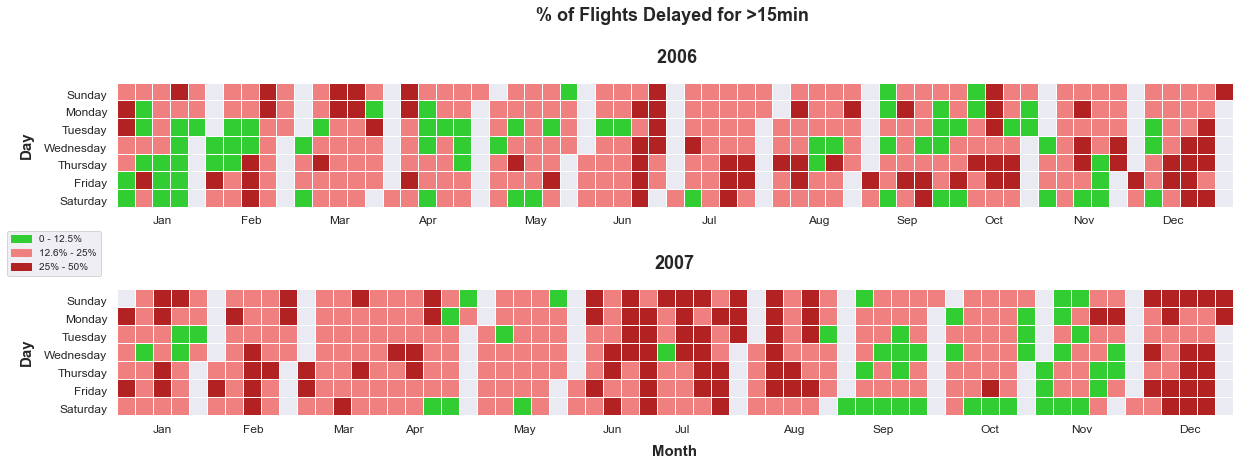

In [589]:
# =================== plotting heatmaps ====================

fig, ax=plt.subplots(2,1,figsize=(20,7))

my_colors=[low,med,high,high] #using 4 colors divides value range into 4 and assigns colours accordingly

#For 2006

s = sns.heatmap(pivot_table06, 
            linewidths=.5, square=True, cbar=False,
            cmap=my_colors, vmin=0, vmax=50, ax=ax[0])

#customizing heatmap appearance

s.set_xlabel('')
s.set_ylabel('Day', fontsize=15, fontweight='bold', labelpad=10)
s.set_title('% of Flights Delayed for >15min \n \n 2006', fontsize=18, fontweight='bold', pad=20)
s.set_xticks([2,7,12,17,23,28,33,39,44,49,54,59])
s.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                  fontsize=12, horizontalalignment='left', rotation=None)
s.set_yticks([1,2,3,4,5,6,7])
s.set_yticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                  fontsize=12, verticalalignment='bottom')


#For 2007

p = sns.heatmap(pivot_table07, 
            linewidths=.5, square=True, cbar=False,
            cmap=my_colors, vmin=0, vmax=50, ax=ax[1])

#customizing heatmap appearance

p.set_xlabel('Month', fontsize=15, fontweight='bold', labelpad=10)
p.set_ylabel('Day', fontsize=15, fontweight='bold', labelpad=10)
p.set_title('2007', fontsize=18, fontweight='bold', pad=20)
p.set_xticks([2,7,12,16,22,27,31,37,42,48,53,59])
p.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                  fontsize=12, horizontalalignment='left', rotation=None)
p.set_yticks([1,2,3,4,5,6,7])
p.set_yticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                  fontsize=12, verticalalignment='bottom')


#adding a legend

import matplotlib.patches as mpatches
green = mpatches.Patch(color='limegreen', label='0 - 12.5%')
pink = mpatches.Patch(color='lightcoral', label='12.6% - 25%')
red = mpatches.Patch(color='firebrick', label='25% - 50%')

plt.legend(handles=[green,pink,red], fontsize=10, bbox_to_anchor=(-0.01,1.5))

plt.savefig('Delays per year')